In [84]:
%reset -f 

import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist

In [85]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

train_X.shape , train_y.shape

((60000, 28, 28), (60000,))

In [86]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')

train_X = train_X / 255.0
test_X = test_X / 255.0

# train_y = tf.keras.utils.to_categorical(train_y)
# test_y = tf.keras.utils.to_categorical(test_y)

## Dense Layer

In [106]:
model=None
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

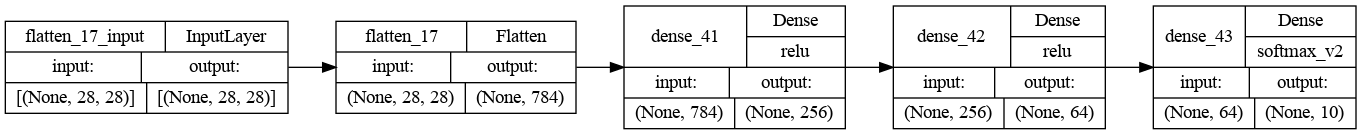

In [107]:
tf.keras.utils.plot_model(
    model,
    to_file='model.png',
    show_shapes=True,
    rankdir='LR', #TB/LR
    show_layer_activations=True
)

In [108]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_17 (Flatten)        (None, 784)               0         
                                                                 
 dense_41 (Dense)            (None, 256)               200960    
                                                                 
 dense_42 (Dense)            (None, 64)                16448     
                                                                 
 dense_43 (Dense)            (None, 10)                650       
                                                                 
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


In [92]:
784*256+256, 256*64+64, 64*10+10

(200960, 16448, 650)

In [109]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_X, train_y, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 904us/step - loss: 0.2121 - accuracy: 0.9370
Epoch 2/5
1875/1875 [==============================] - 2s 898us/step - loss: 0.0876 - accuracy: 0.9732
Epoch 3/5
1875/1875 [==============================] - 2s 903us/step - loss: 0.0612 - accuracy: 0.9808
Epoch 4/5
1875/1875 [==============================] - 2s 902us/step - loss: 0.0448 - accuracy: 0.9854
Epoch 5/5
1875/1875 [==============================] - 2s 904us/step - loss: 0.0348 - accuracy: 0.9889


In [110]:
model.evaluate(test_X, test_y)

313/313 [==============================] - 0s 782us/step - loss: 0.0789 - accuracy: 0.9762


[0.07888688892126083, 0.9761999845504761]

In [111]:
classifications = model.predict(test_X)
print(classifications[0])
print(test_y[0])

313/313 [==============================] - 0s 573us/step
[6.3527473e-08 3.7765798e-07 5.7599908e-07 9.4008254e-05 2.4698933e-13
 2.1847319e-08 5.0524016e-13 9.9990380e-01 1.9550417e-07 9.7128918e-07]
7


## CNN

In [113]:
model=None
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu',
    input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

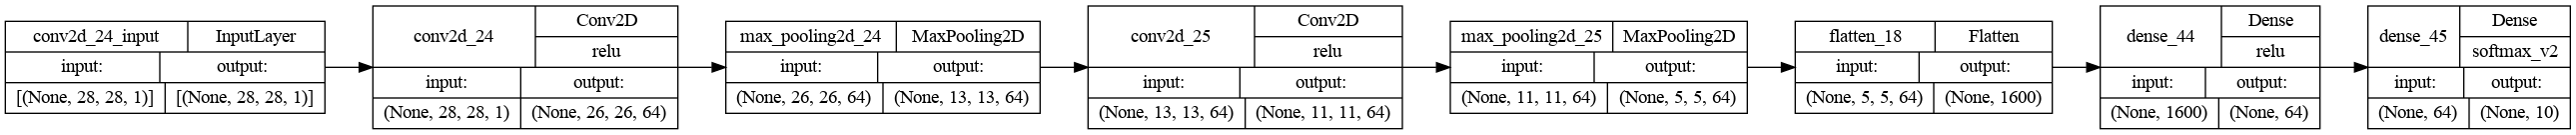

In [114]:
tf.keras.utils.plot_model(model,
                          to_file="model.png",
                          show_shapes=True, 
                          rankdir='LR', #TB/LR
                          show_layer_activations=True
                         ) 

In [116]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 13, 13, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 flatten_18 (Flatten)        (None, 1600)              0         
                                                                 
 dense_44 (Dense)            (None, 64)              

In [120]:
# Parameter calculation

# https://towardsdatascience.com/how-to-calculate-the-number-of-parameters-in-keras-models-710683dae0ca

(1*9+1)*64, (64*9+1)*64, 1600*64+64, 64*10+10

(640, 36928, 102464, 650)

In [121]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_X, train_y, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1304 - accuracy: 0.9601
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0439 - accuracy: 0.9865
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0302 - accuracy: 0.9899
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0219 - accuracy: 0.9931
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0163 - accuracy: 0.9947


In [122]:
model.evaluate(test_X, test_y)

313/313 [==============================] - 0s 1ms/step - loss: 0.0279 - accuracy: 0.9909


[0.027851330116391182, 0.9908999800682068]

In [123]:
classifications = model.predict(test_X)
print(classifications[0])
print(test_y[0])

313/313 [==============================] - 0s 712us/step
[1.9842113e-07 4.0050905e-09 3.2120795e-07 8.3545348e-07 7.8042291e-08
 1.9534858e-09 5.6713678e-13 9.9999762e-01 1.0743831e-07 7.9194848e-07]
7


## Dropout

In [136]:
model=None
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu',
    input_shape=(28, 28, 1)),

    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

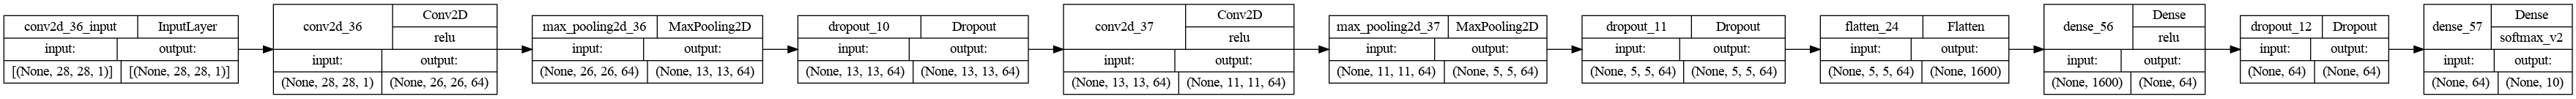

In [137]:
tf.keras.utils.plot_model(model,
                          to_file="model.png",
                          show_shapes=True, 
                          rankdir='LR', #TB/LR
                          show_layer_activations=True
                         ) 

In [138]:
model.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 13, 13, 64)       0         
 g2D)                                                            
                                                                 
 dropout_10 (Dropout)        (None, 13, 13, 64)        0         
                                                                 
 conv2d_37 (Conv2D)          (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 dropout_11 (Dropout)        (None, 5, 5, 64)        

In [139]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_X, train_y, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1936 - accuracy: 0.9393
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0729 - accuracy: 0.9779
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0543 - accuracy: 0.9831
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0449 - accuracy: 0.9861
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0393 - accuracy: 0.9878


In [140]:
model.evaluate(test_X, test_y)

313/313 [==============================] - 0s 1ms/step - loss: 0.0298 - accuracy: 0.9896


[0.02984231896698475, 0.9896000027656555]

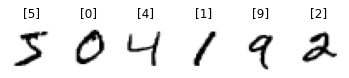

In [167]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,6)
for i in range(6):
    ax[i].imshow(train_X[i:i+1,:,:].reshape(28,28), cmap="binary")
    ax[i].axis("off")
    ax[i].set_title(str(train_y[i:i+1]))
    